In [1]:
import numpy as np, matplotlib.pyplot as plt, matplotlib as mpl, pandas as pd
import seaborn.apionly as sns
%matplotlib inline

In [2]:
sns.set_context('poster')

In [3]:
def make_array(param_string):
    return np.array(param_string.strip('[]').replace('\n','').split()).astype(float)


In [4]:
df = pd.read_csv('results/varations.csv')
df['data_params'] = df['data_params'].apply(make_array)
df['model_params'] = df['model_params'].apply(make_array)
df['loglog'] = np.log10(np.abs(df.log_like.values))
df['loglog'][df['loglog'].values <= 0.01] = 0.01
df['loglog'] = np.sign(df.log_like.values) * df['loglog'].values
df.gal_num = df.gal_num.values.astype(int)
df.N_im = df.N_im.values.astype(int)
df.param_num = df.param_num.values.astype(int)
df.like_mode = df.like_mode.values.astype(int)
df.head()

/Users/bcook/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,gal_num,N_im,param_num,vary_frac,like_mode,lum_cut,log_like,data_params,data_meta,model_params,model_meta,loglog
0,0,256,-1,0.0,0,inf,106950.00000,"[-0.5, -0.3, 0.75426991, 1.75426991, 2.1349388...",[ 4.],"[-0.5, -0.3, 0.75426991, 1.75426991, 2.1349388...",[ 4.],5.029181
1,0,256,-1,0.0,1,inf,-974.98000,"[-0.5, -0.3, 0.75426991, 1.75426991, 2.1349388...",[ 4.],"[-0.5, -0.3, 0.75426991, 1.75426991, 2.1349388...",[ 4.],-2.988996
2,0,256,-1,0.0,2,inf,-0.40084,"[-0.5, -0.3, 0.75426991, 1.75426991, 2.1349388...",[ 4.],"[-0.5, -0.3, 0.75426991, 1.75426991, 2.1349388...",[ 4.],-0.010000
3,0,256,-1,0.0,0,inf,107320.00000,"[-0.5, -0.3, 0.75426991, 1.75426991, 2.1349388...",[ 4.],"[-0.5, -0.3, 0.75426991, 1.75426991, 2.1349388...",[ 4.],5.030681
4,0,256,-1,0.0,1,inf,-823.23000,"[-0.5, -0.3, 0.75426991, 1.75426991, 2.1349388...",[ 4.],"[-0.5, -0.3, 0.75426991, 1.75426991, 2.1349388...",[ 4.],-2.915521


In [5]:
df.param_num.values

array([-1, -1, -1, ...,  8,  8,  8])

In [6]:
df.data_params[0]

array([-0.5       , -0.3       ,  0.75426991,  1.75426991,  2.13493886,
        2.63493886,  3.13493886,  3.63493886,  3.56710397])

In [7]:
from pcmdpy import galaxy

GPU acceleration not available, sorry
pycuda not installed.


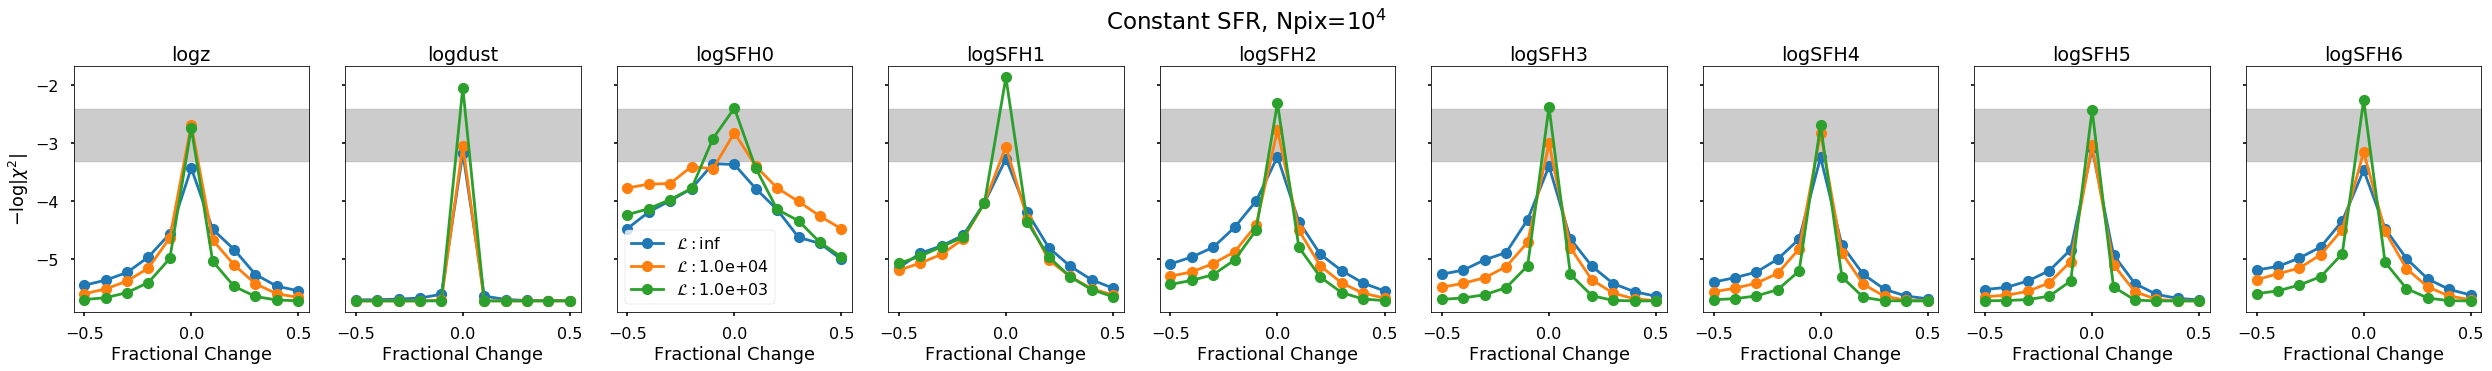

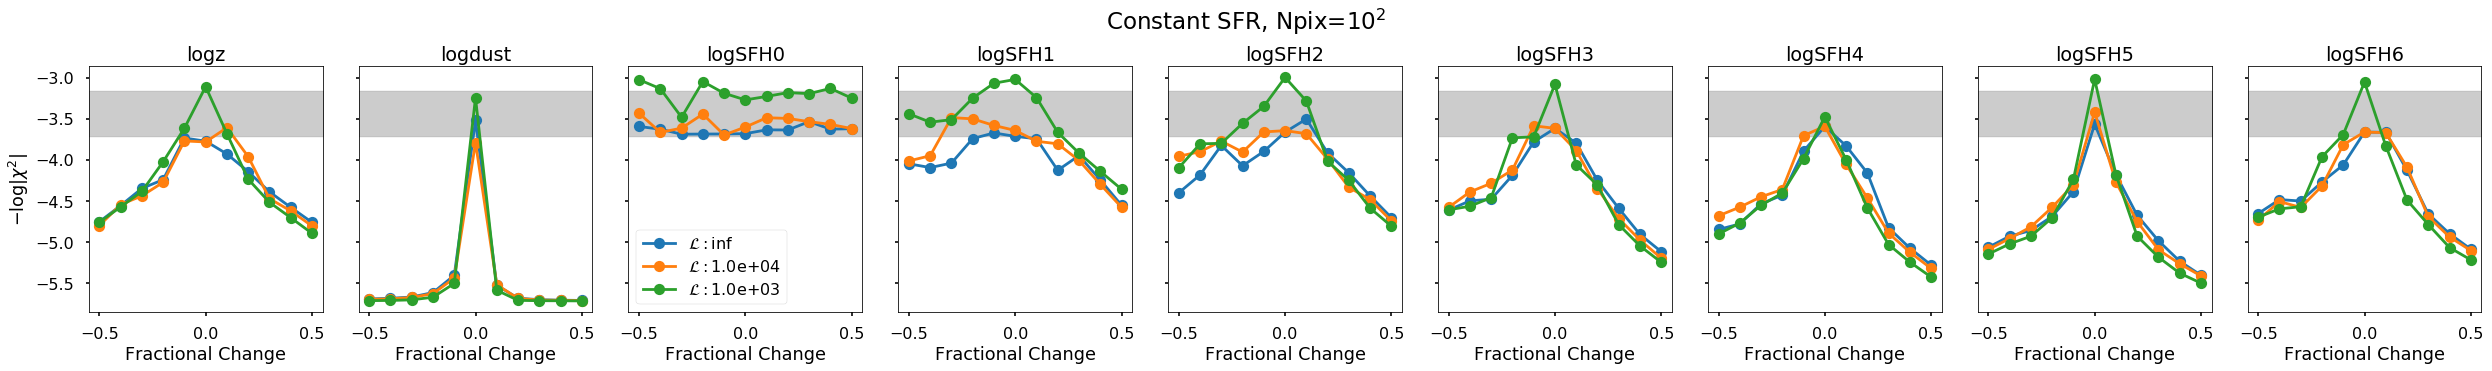

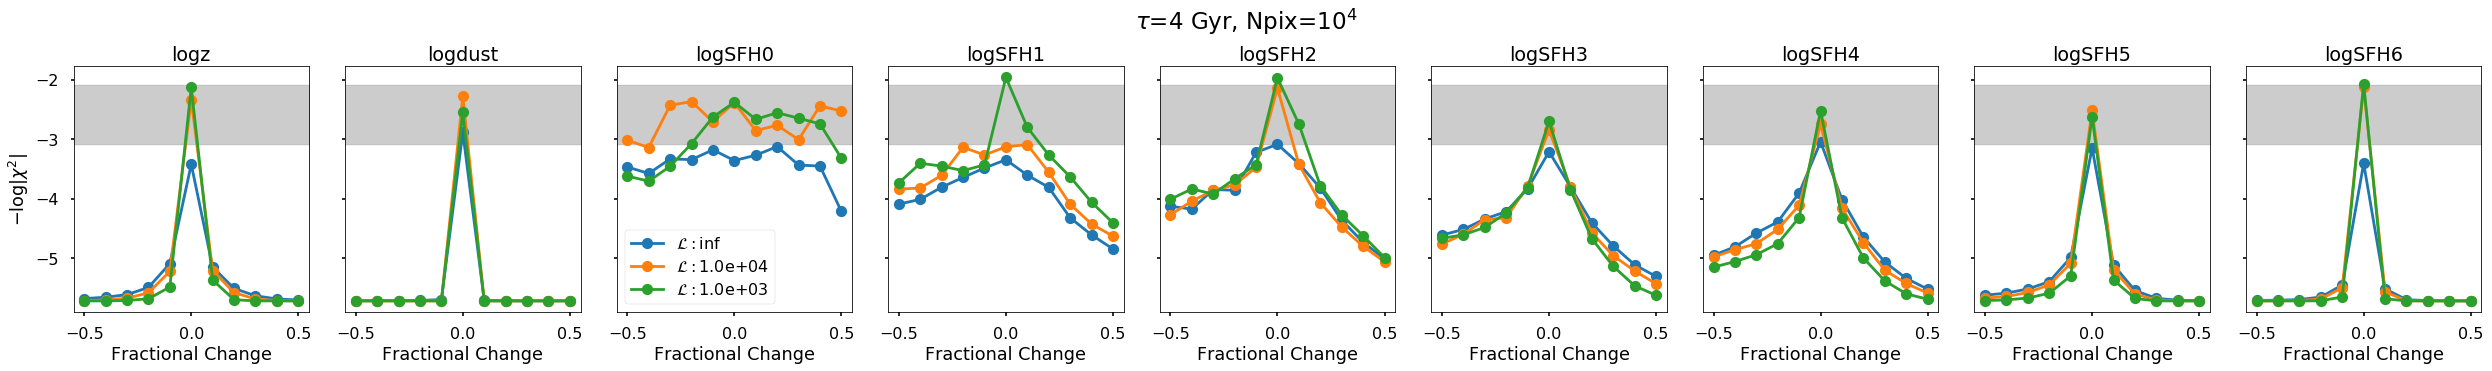

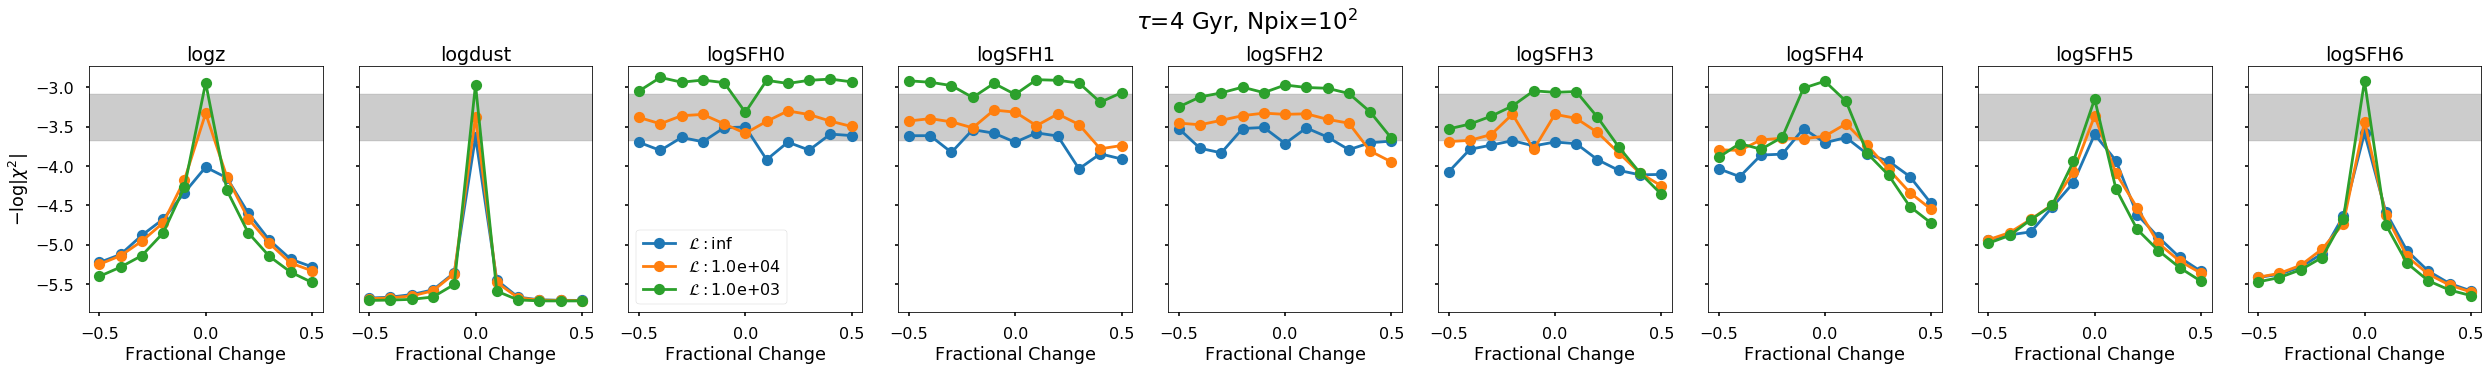

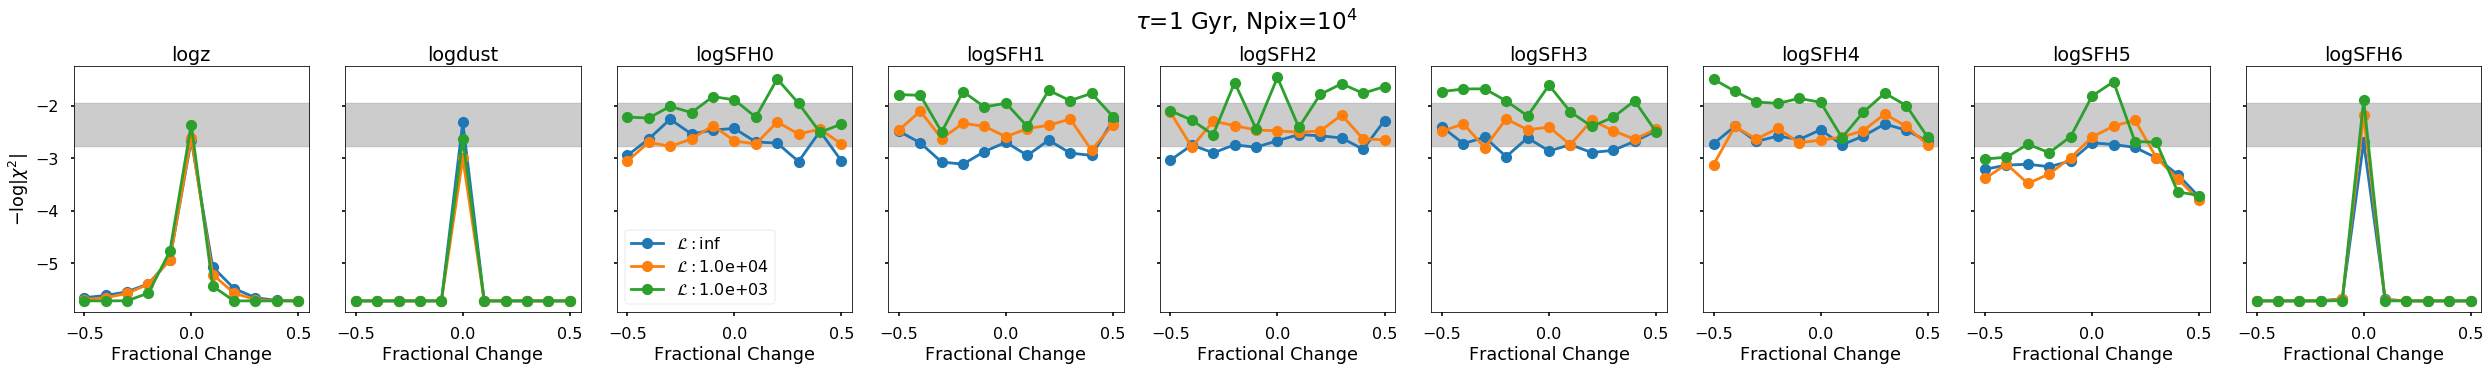

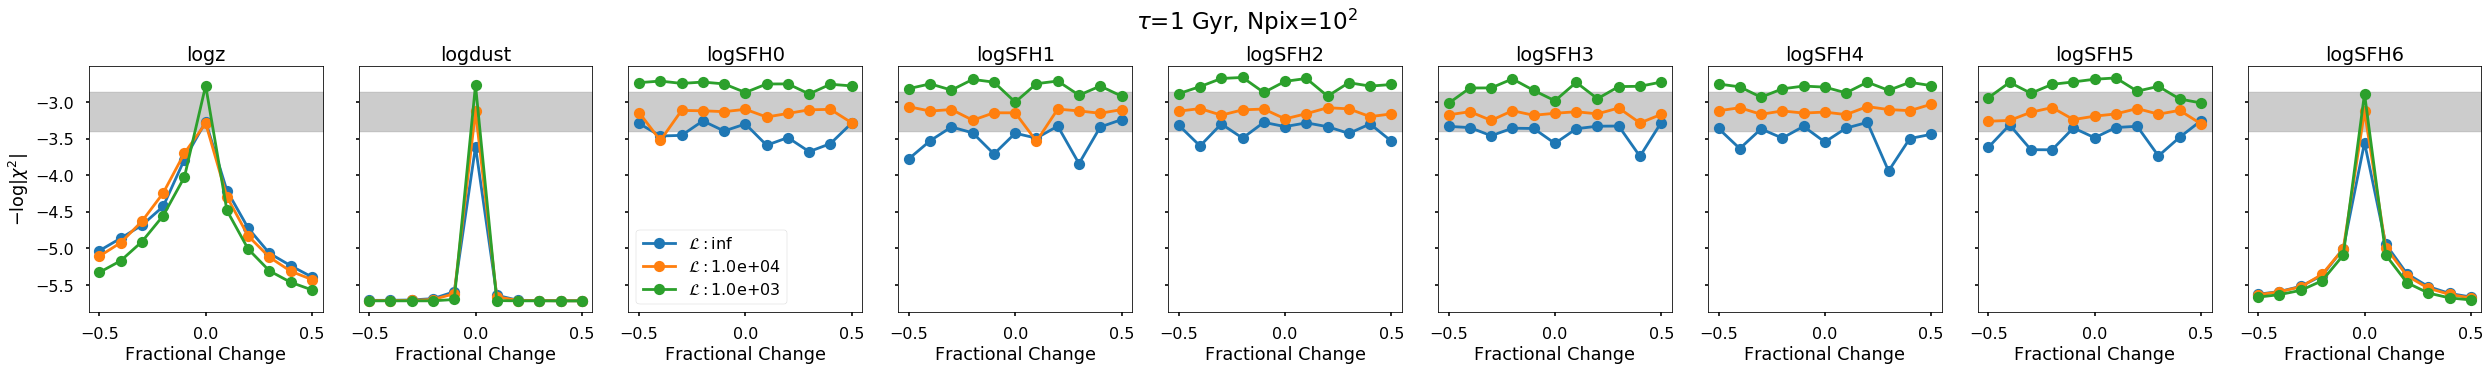

In [26]:
N_im = 512
lm = 1
gal_des = [r'Constant SFR, Npix=10$^4$', r'Constant SFR, Npix=10$^2$', r'$\tau$=4 Gyr, Npix=10$^4$',
          r'$\tau$=4 Gyr, Npix=10$^2$', r'$\tau$=1 Gyr, Npix=10$^4$', r'$\tau$=1 Gyr, Npix=10$^2$']
for i, gal_num in enumerate(sorted(df.gal_num.unique())):
    sub_df = df[(df.gal_num == gal_num)&(df.N_im == N_im)&(df.like_mode==lm)]
    mean, std = np.mean(sub_df[(sub_df.param_num == -1)].loglog.values), np.std(sub_df[sub_df.vary_frac == 0.0].loglog.values)

    pnames = galaxy.Galaxy_Model(np.ones(9))._param_names

    sub_df[(sub_df.param_num == 3)&(sub_df.vary_frac==0.1)].head()
    fig, axes = plt.subplots(ncols=9, figsize=(35, 5), sharey=True)
    for j, ax in enumerate(axes):
        ax.fill_between([-0.6, 0.6], y1=mean-std, y2=mean+std, alpha=0.2, color='k')
        for lc in df.lum_cut.unique():
            fracs = []
            logs = []
            for f in sorted(sub_df.vary_frac.unique()):
                temp_df = sub_df[(sub_df.param_num == j)&(sub_df.vary_frac==f)&(sub_df.lum_cut==lc)]
                fracs.append(f)
                logs.append(temp_df.loglog.values)
            ax.plot(fracs, logs, ls='-', marker='o', label=r'$\mathcal{L}: $'+'%.1e'%lc)
        ax.set_title(pnames[j])
        ax.set_xlabel('Fractional Change')
        ax.set_xlim([-0.55, 0.55])
    axes[0].set_ylabel(r'$-\log|\chi^2|$')
    axes[2].legend(loc=0)
    plt.tight_layout()
    plt.suptitle(gal_des[i], y=1.05)

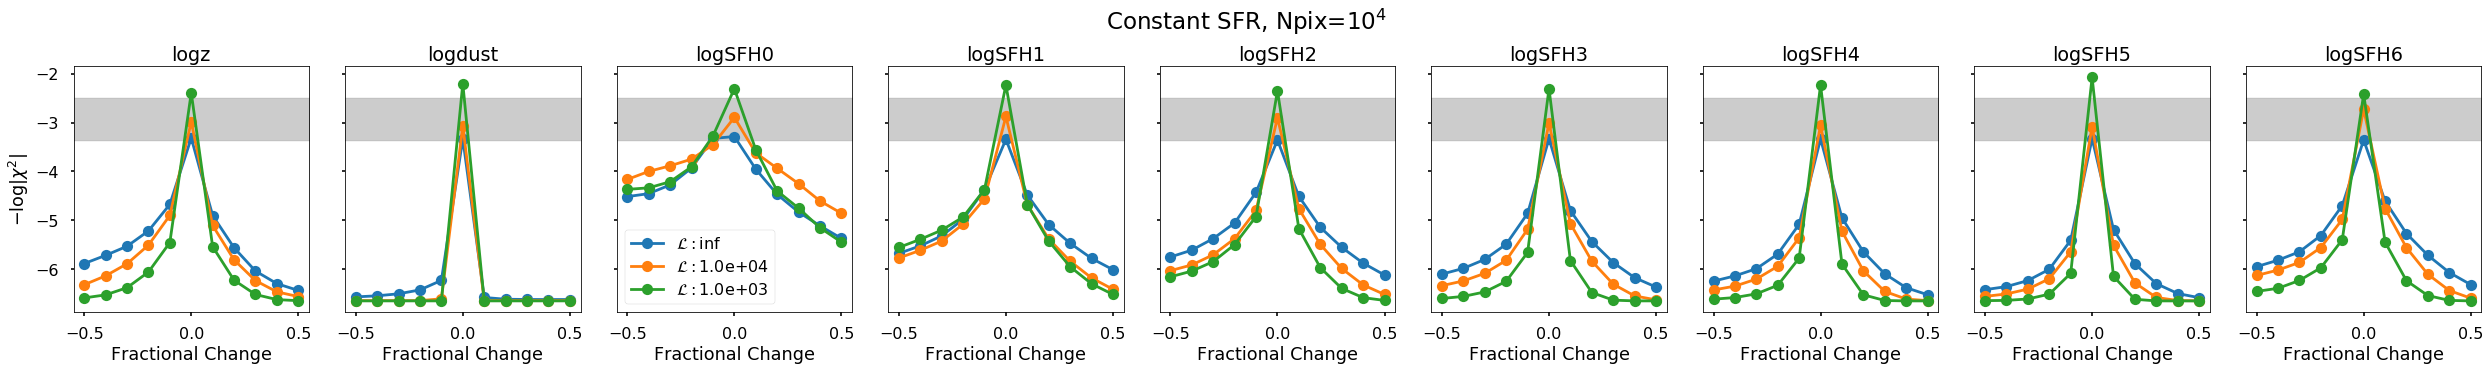

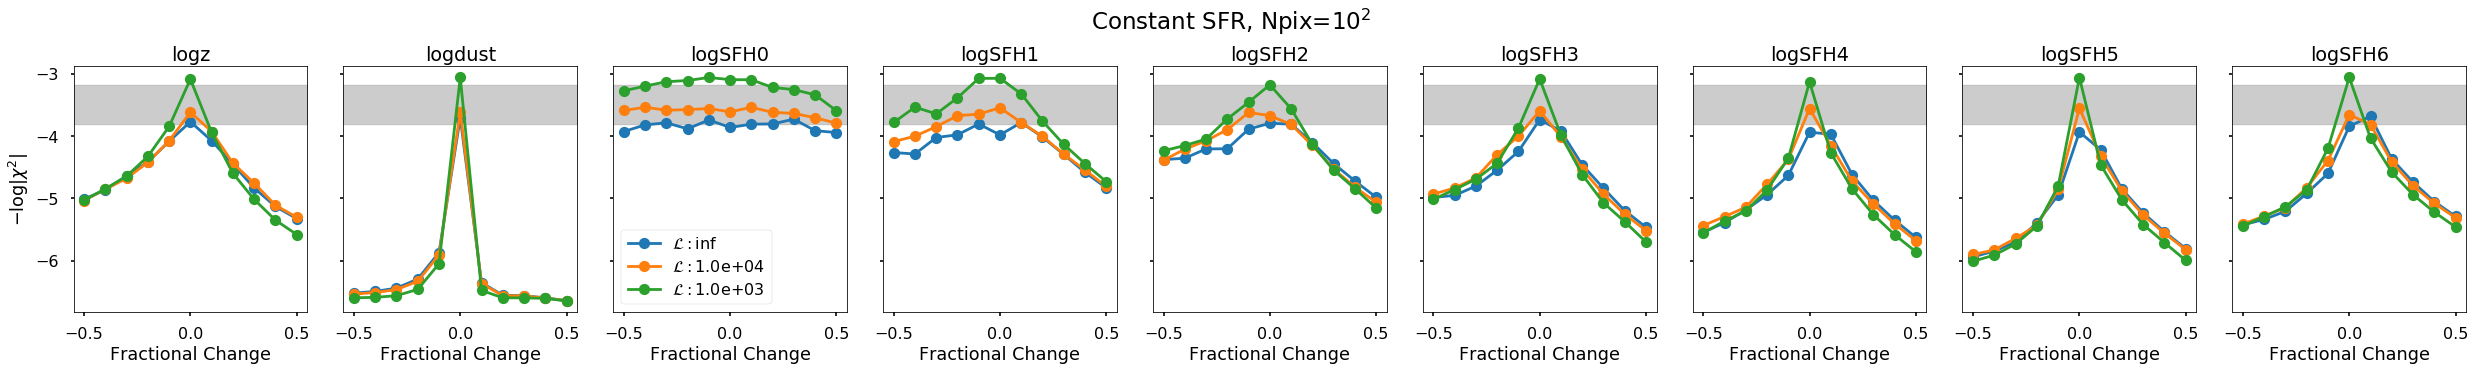

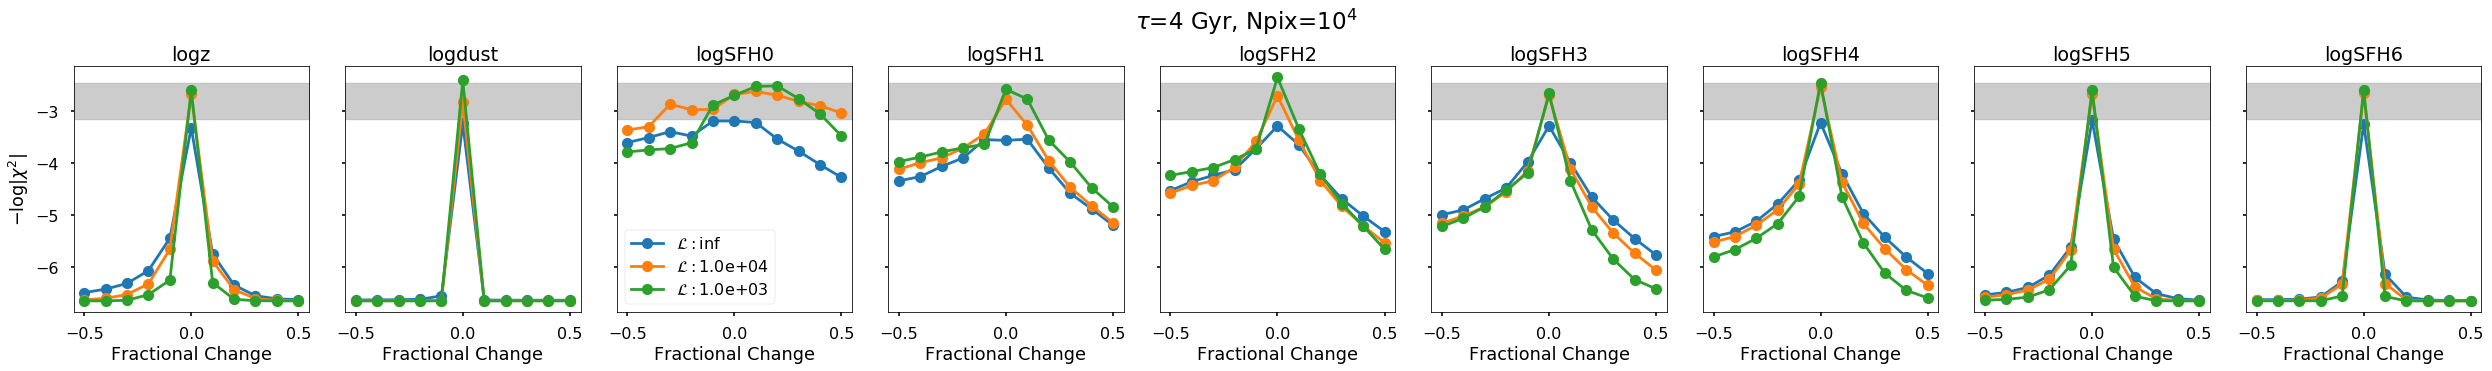

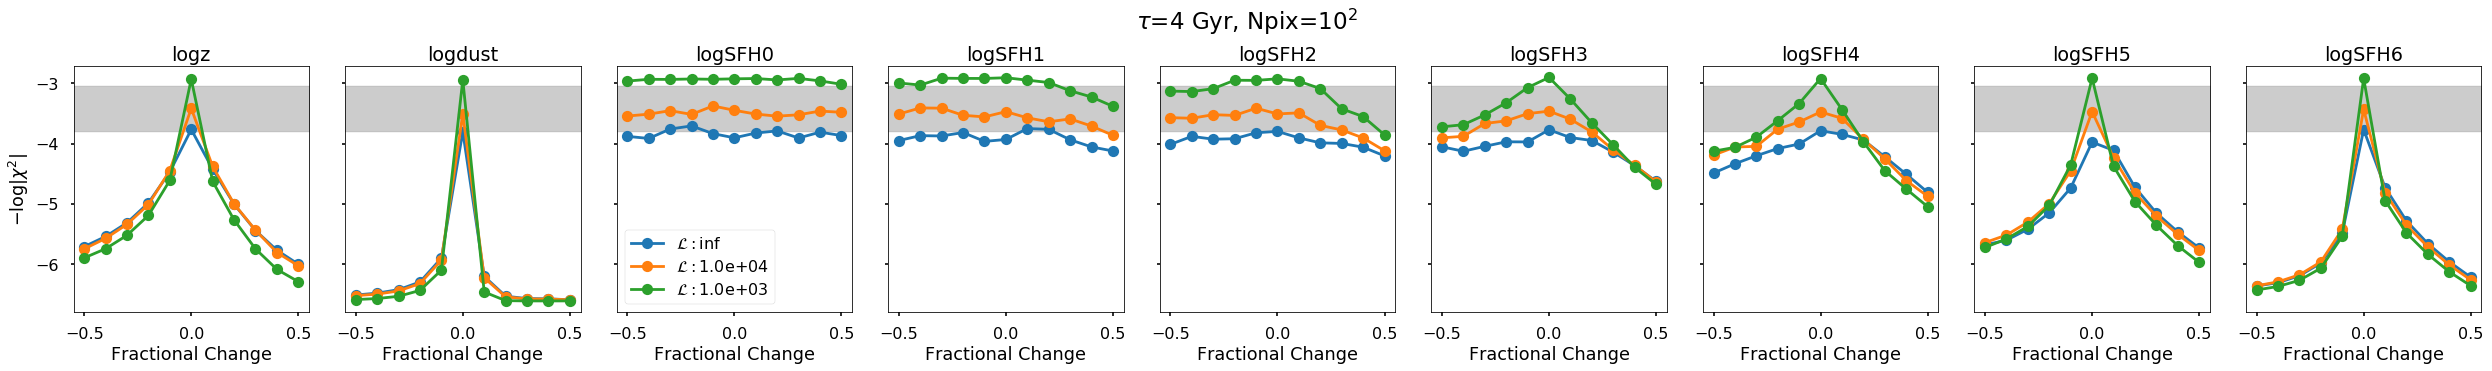

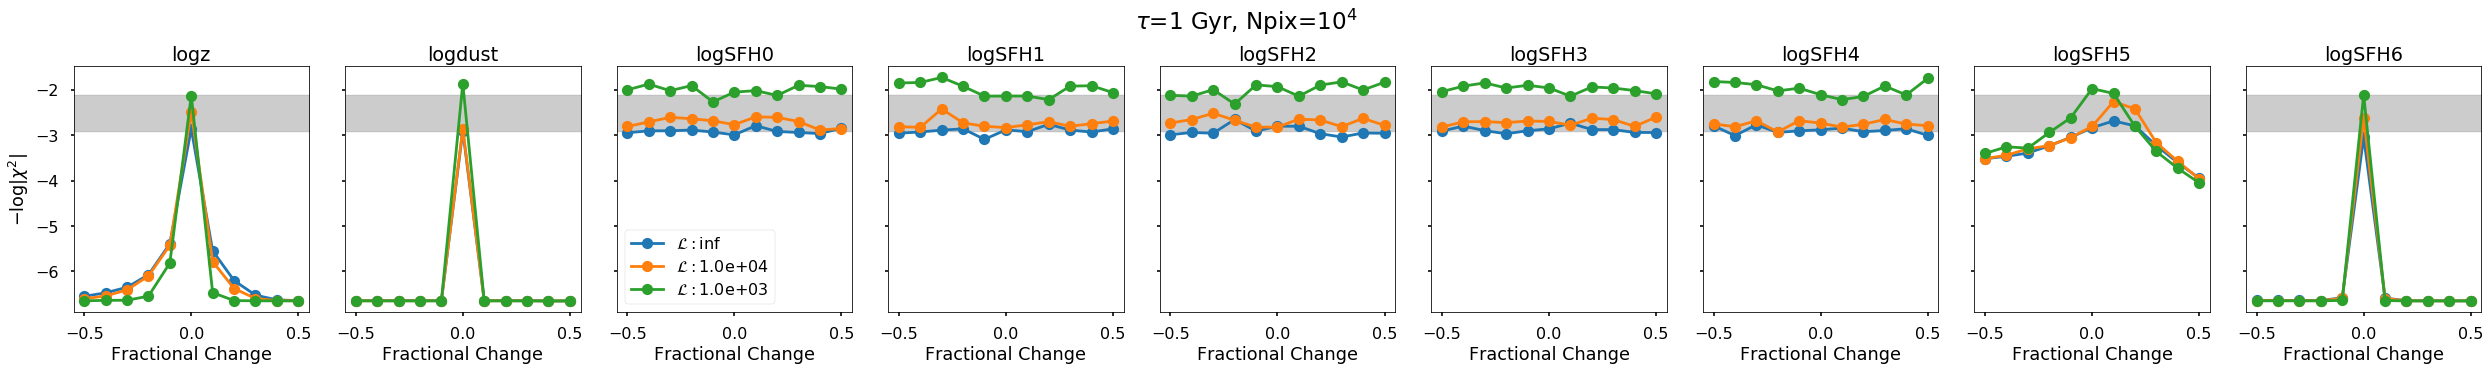

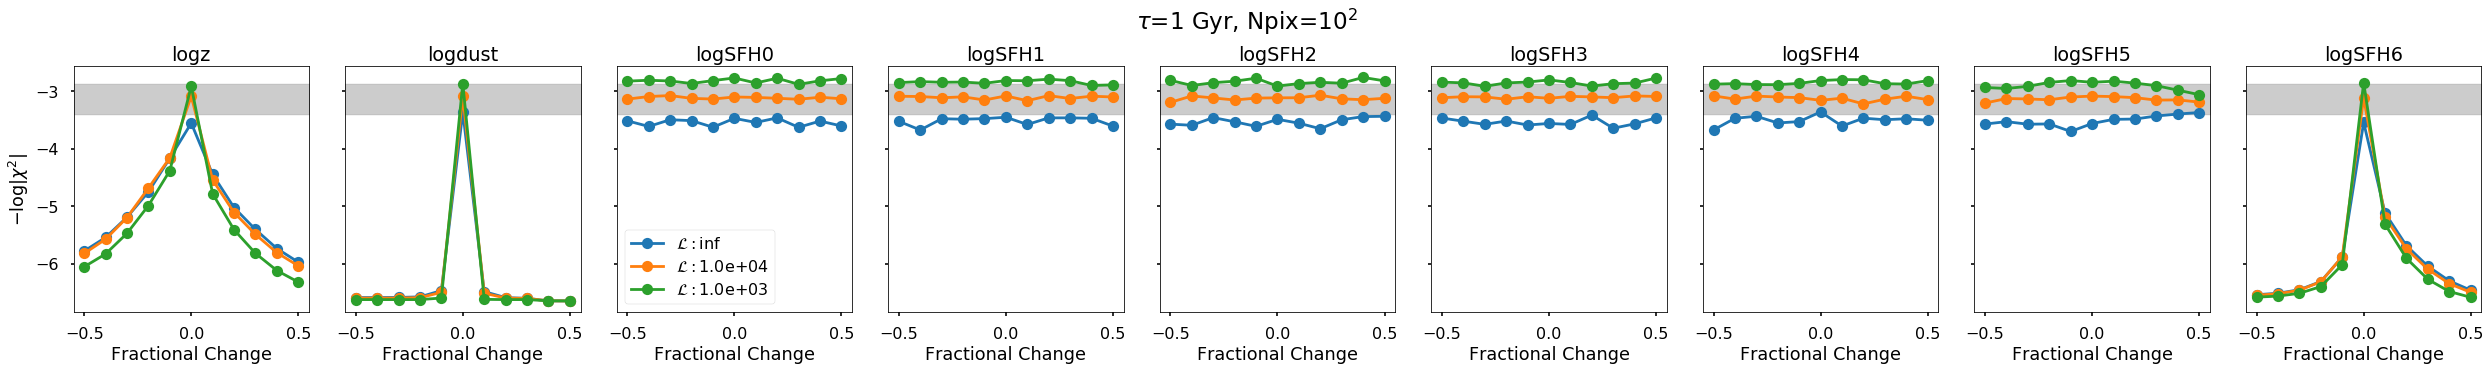

In [25]:
N_im = 2048
lm = 1
gal_des = [r'Constant SFR, Npix=10$^4$', r'Constant SFR, Npix=10$^2$', r'$\tau$=4 Gyr, Npix=10$^4$',
          r'$\tau$=4 Gyr, Npix=10$^2$', r'$\tau$=1 Gyr, Npix=10$^4$', r'$\tau$=1 Gyr, Npix=10$^2$']
for i, gal_num in enumerate(sorted(df.gal_num.unique())):
    sub_df = df[(df.gal_num == gal_num)&(df.N_im == N_im)&(df.like_mode==lm)]
    mean, std = np.mean(sub_df[(sub_df.param_num == -1)].loglog.values), np.std(sub_df[sub_df.vary_frac == 0.0].loglog.values)

    pnames = galaxy.Galaxy_Model(np.ones(9))._param_names

    sub_df[(sub_df.param_num == 3)&(sub_df.vary_frac==0.1)].head()
    fig, axes = plt.subplots(ncols=9, figsize=(35, 5), sharey=True)
    for j, ax in enumerate(axes):
        ax.fill_between([-0.6, 0.6], y1=mean-std, y2=mean+std, alpha=0.2, color='k')
        for lc in df.lum_cut.unique():
            fracs = []
            logs = []
            for f in sorted(sub_df.vary_frac.unique()):
                temp_df = sub_df[(sub_df.param_num == j)&(sub_df.vary_frac==f)&(sub_df.lum_cut==lc)]
                fracs.append(f)
                logs.append(temp_df.loglog.values)
            ax.plot(fracs, logs, ls='-', marker='o', label=r'$\mathcal{L}: $'+'%.1e'%lc)
        ax.set_title(pnames[j])
        ax.set_xlabel('Fractional Change')
        ax.set_xlim([-0.55, 0.55])
    axes[0].set_ylabel(r'$-\log|\chi^2|$')
    axes[2].legend(loc=0)
    plt.tight_layout()
    plt.suptitle(gal_des[i], y=1.05)